In [40]:
"""
Functions for Filtering Stimulated Pulses
AIM Summer Scholars Program Research



"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Function that accepts a csv filename and a column to look in for positive values in the column ('log2fold' in this case) given.
#The function accepts a csv file and a column name in the form of Python strings to search through, and returns a dataframe
#
def PositiveLogFoldChecker(csv_filename: str, search_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    positive_log_fold_df = df[df[search_column_name] > 0]
    print("There are " + str(len(positive_log_fold_df.index)) + " number of transcripts that are stimulated by pulse for " 
          + csv_filename + " out of " + str(len(df))) 
    
    return positive_log_fold_df


#Same function as first function, except a significance level (p-value) is given as a threshold and another column is given 
#to compare the p values with the threshold p value given. 
#Returns significant data (data <= p value) that also has positive values
def PositiveLogFoldSignificantDataChecker(csv_filename: str, search_column_name: str, p_value: float,
                                         padj_value_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    df_copy = df[(df[padj_value_column_name] <= p_value) & (df[search_column_name] > 0)]
    print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
+ str(p_value) + " or below for " + csv_filename + " out of " + str(len(df.index)))
    
    return df_copy

#Function that checks for negatives in a given column ('log2fold' in this case) and returns a dataframe with the negatives
def NegativeLogFoldChecker(csv_filename: str, search_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    negative_log_fold_df = df[df[search_column_name] <= 0]
    print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
          + csv_filename + " out of " + str(len(df))) 
    
    return negative_log_fold_df

#Same function as the previous one, but with a specific threshold for the p-value. Returns a dataframe with negatives
# and data that is <= the given threshold for p value.
def NegativeLogFoldCheckerSignificantDataChecker(csv_filename: str, search_column_name: str,  p_value: float,
                                         padj_value_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    negative_log_fold_significant_data_df = df[(df[search_column_name] <= 0) & (df[padj_value_column_name] <= p_value)]
    print("There are " + str(len(negative_log_fold_significant_data_df.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
+ str(p_value) + " or below for " + csv_filename + " out of " + str(len(negative_log_fold_significant_data_df)))
    
    return negative_log_fold_significant_data_df

#Function exports dataframes as csv files.
def CsvFileExporter(df, df_name, index_header):
    import pandas as pd
    return df.to_csv(df_name, index = index_header)

#This function plots a line graph based off of density of the data.
def PValueLineGraph(list_of_p_values, csv_filename, search_column_name):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    df = pd.read_csv(csv_filename)
    p_value_counts = []
    for i in range(len(list_of_p_values)):
        if i == 0:
            p_value_counts.append((len(df[df[search_column_name] <= list_of_p_values[i]])))
        else:
            p_value_counts.append(len(df[(df[search_column_name] <= list_of_p_values[i]) & (df[search_column_name] >= list_of_p_values[i-1])]))
    
    pvaluecountdict = {'p value' : list_of_p_values, 'count' : p_value_counts}
    df1 = pd.DataFrame.from_dict(pvaluecountdict)
    
    print("This is the graph on p-values and their counts for " + csv_filename + ":")
    p_value_counts_bargraph = sns.lineplot(data = df1, x = 'p value', y = 'count')
    plt.show()
    return df1
  
def PositiveLogGraph():
    df = pd.read_csv()

    
                            
    






There are 37 number of transcripts that are stimulated by pulse for collectionTime_12.pulseConditionsNoZeros.csv out of 73
There are 37 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for collectionTime_12.pulseConditionsNoZeros.csv out of 73
There are 163 number of transcripts that are stimulated by pulse for collectionTime_3.pulseConditionsNoZeros.csv out of 213
There are 163 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for collectionTime_3.pulseConditionsNoZeros.csv out of 213
There are 36 number of transcripts that are not stimulated by pulse for collectionTime_12.pulseConditionsNoZeros.csv out of 73
There are 50 number of transcripts that are not stimulated by pulse for collectionTime_3.pulseConditionsNoZeros.csv out of 213
There are 50 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for collectionTime_3.pulseConditionsNoZeros.csv out of 50
There are 36 number

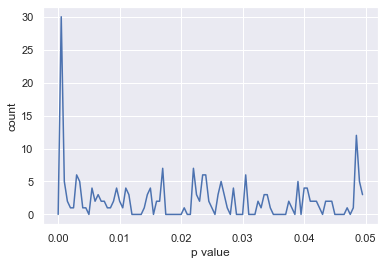

This is the graph on p-values and their counts for noPulse.TimeConditionsNoZeros.csv:


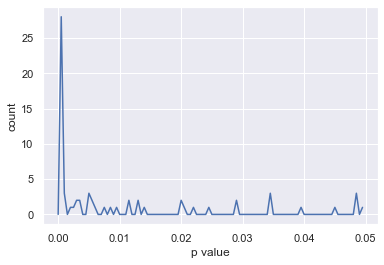

This is the graph on p-values and their counts for Pulse.TimeConditionsNoZeros.csv:


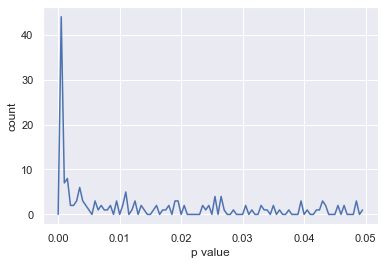

This is a graph with all the data above plotted all at once:


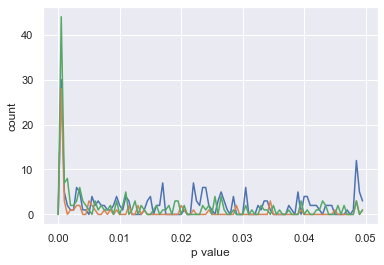

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Looking for positive values in the log2fold column
df_zt12_nozeros = PositiveLogFoldChecker('collectionTime_12.pulseConditionsNoZeros.csv', 'log2FoldChange')
#display(df_zt12_nozeros)
df1_filtered_zt12_nozeros = PositiveLogFoldSignificantDataChecker('collectionTime_12.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, "padj")
#display(df1_filtered_zt12_nozeros)

df_zt3_nozeros = PositiveLogFoldChecker('collectionTime_3.pulseConditionsNoZeros.csv', 'log2FoldChange')
#display(df_zt3_nozeros)

df1_filtered_zt3_nozeros = PositiveLogFoldSignificantDataChecker('collectionTime_3.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, 'padj')
#display(df1_filtered_zt3_nozeros)

df_nonfiltered_zt12 = NegativeLogFoldChecker('collectionTime_12.pulseConditionsNoZeros.csv', 'log2FoldChange')
#display(df_nonfiltered_zt12)

df_nonfiltered_zt3 = NegativeLogFoldChecker('collectionTime_3.pulseConditionsNoZeros.csv', 'log2FoldChange')
#display(df_nonfiltered_zt3)

df_negative_log_fold_p_value_zt3 = NegativeLogFoldCheckerSignificantDataChecker('collectionTime_3.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, "padj")
#display(df_negative_log_fold_p_value_zt3)

df_negative_log_fold_p_value_zt12 = NegativeLogFoldCheckerSignificantDataChecker('collectionTime_12.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, "padj")
#display(df_negative_log_fold_p_value_zt12)

CsvFileExporter(df_zt12_nozeros, "df_zt12_nozeros.csv", 'Transcripts')
CsvFileExporter(df1_filtered_zt12_nozeros, "df1_filtered_zt12_nozeros.csv", 'Transcripts')
CsvFileExporter(df_zt3_nozeros, "df_zt3_nozeros.csv" ,'Transcripts')
CsvFileExporter(df1_filtered_zt3_nozeros, "df1_filtered_zt3_nozeros.csv", 'Transcripts')
CsvFileExporter(df_nonfiltered_zt12, "df_nonfiltered_zt12.csv", 'Transcripts')
CsvFileExporter(df_nonfiltered_zt3, "df_nonfiltered_zt3.csv", 'Transcripts')
CsvFileExporter(df_negative_log_fold_p_value_zt3, 'df_negative_log_fold_p_value_zt3', 'Transcripts')
CsvFileExporter(df_negative_log_fold_p_value_zt12, 'df_negative_log_fold_p_value_zt12', 'Transcripts')

zt3_padj_df = PValueLineGraph(np.arange(0.0, 0.05, 0.0005), 'collectionTime_3.pulseConditionsNoZeros.csv', 'padj')
nopulse_padj_df = PValueLineGraph(np.arange(0.0, 0.05, 0.0005), 'noPulse.TimeConditionsNoZeros.csv', 'padj')
pulse_padj_df = PValueLineGraph(np.arange(0.0, 0.05, 0.0005), 'Pulse.TimeConditionsNoZeros.csv', 'padj')
print("This is a graph with all the data above plotted all at once:")
sns.lineplot(data = zt3_padj_df, x = 'p value', y = 'count')
sns.lineplot(data = nopulse_padj_df, x = 'p value', y = 'count')
sns.lineplot(data = pulse_padj_df, x = 'p value', y = 'count')
plt.show()
#df = pd.read_csv('collectionTime_3.pulseConditionsNoZeros.csv')
#print(df1.columns)
#plt.hist(df.padj, bins = 10)
#plt.show()



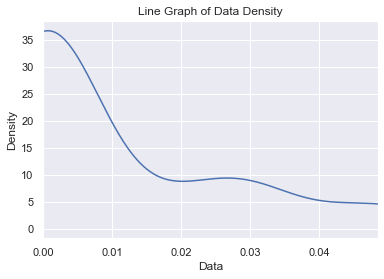

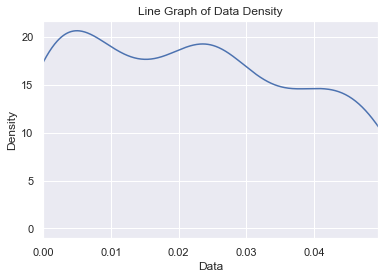

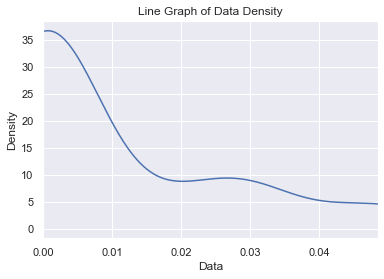

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_line_graph(data):
    data.plot.density()
    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.title('Line Graph of Data Density')
    plt.xlim(data.min(),data.max())
    plt.grid(True)
    plt.show()
# Example usage
#data = pd.Series([1, 2, 3, 2, 1, 1, 4, 5, 2, 3, 1, 3, 3])
plot_line_graph(padj)
plot_line_graph(padj1)
plot_line_graph(padj2)
#plt.show()


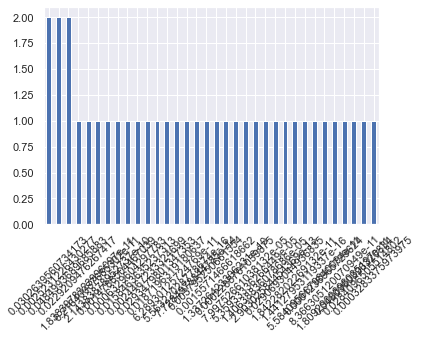

In [18]:
#sns.histplot(df_zt12_nozeros.padj, color = 'red')
#sns.histplot(df1_filtered_zt12_nozeros.padj, color = 'blue')
'''import scipy.stats as stats
(df_zt12_nozeros.padj.value_counts().plot(kind = 'bar'))
density = stats.gaussian_kde(df_zt12_nozeros.padj)
plt.plot()
plt.xticks(rotation = 45)
plt.show()
'''

In [13]:
# Sorry, I was exploring classes since both functions have aspects that are the same
class pulseCheck():
    import pandas as pd
    def __init__(self, csv_filename, search_column_name):
        self.csv_filename = csv_filename
        self.search_column_name = search_column_name
        
    def pulseStimulationCheck(self):
        import pandas as pd
        df = pd.read_csv(self.csv_filename, index_col=0)
        df_copy = df[df[self.search_column_name] > 0]
        print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse.")
        return df_copy
    
    def pulseStimulationSignificantDataCheck(self, p_value: float, padj_value_column_name: str):
        df = pd.read_csv(csv_filename, index_col=0)
        df_copy = df[(df[padj_value_column_name] <= p_value) & (df[self.search_column_name] > 0)]
        print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
    + str(p_value) + " or below for " + csv_filename + " out of " + str(len(df.index)))

        return df_copy
    
    def NegativeLogFoldChecker(self):
        import pandas as pd
        df = pd.read_csv(csv_filename, index_col=0)
        negative_log_fold_df = df[df[search_column_name] <= 0]
        print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
              + csv_filename + " out of " + str(len(df))) 

        return negative_log_fold_df

    def NegativeLogFoldCheckerSignificantDataChecker(self,  p_value: float, padj_value_column_name: str):
        import pandas as pd
        df = pd.read_csv(csv_filename, index_col=0)
        negative_log_fold_df = df[(df[search_column_name] <= 0) & (df[padj_value_column_name] <= p_value)]
        print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
              + csv_filename + " out of " + str(len(df))) 

        return negative_log_fold_df

    def CsvFileExporter(self, df, df_name, index_header):
        import pandas as pd
        return df.to_csv(df_name, index = index_header)

df = pulseCheck('collectionTime_12.pulseConditionsNoZeros.csv', 'log2FoldChange')
df_zt12_nozeros = df.pulseStimulationCheck()


There are 37 number of transcripts that are stimulated by pulse.


In [2]:
df_zt12_nozeros = pulseStimulationCheckForPositives('collectionTime_12.pulseConditionsNoZeros.csv', 'log2FoldChange')

There are 37 number of transcripts that are stimulated by pulse for collectionTime_12.pulseConditionsNoZeros.csv out of 73


This is the graph on p-values and their counts for collectionTime_3.pulseConditionsNoZeros.csv:


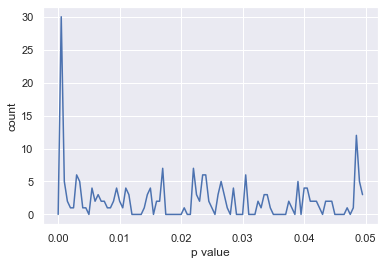

In [37]:
"""
Functions for Filtering Stimulated Pulses 2.0
AIM Summer Scholars Program Research



"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Function that accepts a csv filename and a column to look in for positive values in the column ('log2fold' in this case) given.
#The function accepts a csv file and a column name in the form of Python strings to search through, and returns a dataframe
#
def PositiveLogFoldChecker(csv_filename: str, search_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    positive_log_fold_df = df[df[search_column_name] > 0]
    print("There are " + str(len(positive_log_fold_df.index)) + " number of transcripts that are stimulated by pulse for " 
          + csv_filename + " out of " + str(len(df))) 
    
    return positive_log_fold_df


#Same function as first function, except a significance level (p-value) is given as a threshold and another column is given 
#to compare the p values with the threshold p value given. 
#Returns significant data (data <= p value) that also has positive values
def PositiveLogFoldSignificantDataChecker(csv_filename: str, search_column_name: str, p_value: float,
                                         padj_value_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    df_copy = df[(df[padj_value_column_name] <= p_value) & (df[search_column_name] > 0)]
    print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
+ str(p_value) + " or below for " + csv_filename + " out of " + str(len(df.index)))
    
    return df_copy

#Function that checks for negatives in a given column ('log2fold' in this case) and returns a dataframe with the negatives
def NegativeLogFoldChecker(csv_filename: str, search_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    negative_log_fold_df = df[df[search_column_name] <= 0]
    print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
          + csv_filename + " out of " + str(len(df))) 
    
    return negative_log_fold_df

#Same function as the previous one, but with a specific threshold for the p-value. Returns a dataframe with negatives
# and data that is <= the given threshold for p value.
def NegativeLogFoldCheckerSignificantDataChecker(csv_filename: str, search_column_name: str,  p_value: float,
                                         padj_value_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    negative_log_fold_significant_data_df = df[(df[search_column_name] <= 0) & (df[padj_value_column_name] <= p_value)]
    print("There are " + str(len(negative_log_fold_significant_data_df.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
+ str(p_value) + " or below for " + csv_filename + " out of " + str(len(negative_log_fold_significant_data_df)))
    
    return negative_log_fold_significant_data_df

#Function exports dataframes as csv files.
def CsvFileExporter(df, df_name, index_header):
    import pandas as pd
    return df.to_csv(df_name, index = index_header)

#This function plots a line graph based off of density of the data.
def PValueLineGraph(csv_filename, search_column_name, start_value, end_value, increment_value):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    df = pd.read_csv(csv_filename)
    list_of_p_values = np.arange(start_value, end_value, increment_value)
    p_value_counts = []
    for i in range(len(list_of_p_values)):
        if i == 0:
            p_value_counts.append((len(df[df[search_column_name] <= list_of_p_values[i]])))
        else:
            p_value_counts.append(len(df[(df[search_column_name] <= list_of_p_values[i]) & (df[search_column_name] >= list_of_p_values[i-1])]))
    #print(p_value_counts)
    pvaluecountdict = {'p value' : list_of_p_values, 'count' : p_value_counts}
    df1 = pd.DataFrame.from_dict(pvaluecountdict)
    #print(df1)
    print("This is the graph on p-values and their counts for " + csv_filename + ":")
    p_value_counts_bargraph = sns.lineplot(data = df1, x = 'p value', y = 'count')
    plt.show()
    return df1
    #display(df)
   
    '''data.plot.density()
    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.title('Line Graph of Data Density')
    plt.xlim(data.min(),data.max())
    plt.grid(True)
    plt.show()
    '''
zt3_padj_df = PValueLineGraph('collectionTime_3.pulseConditionsNoZeros.csv', 'padj', 0.0, 0.05,  0.0005)